## SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts.

In [ ]:
# # run this cell if you are using Colab

# !rm -rf CommViolPredUnnormalizedData.txt

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'CommViolPredUnnormalizedData.txt': io.BytesIO(uploaded['CommViolPredUnnormalizedData.txt'])}

# # upload 'CommViolPredUnnormalizedData.txt'

In [2]:
# run this cell if you are using Jupyter
files = {'CommViolPredUnnormalizedData.txt': 'CommViolPredUnnormalizedData.txt'}

## Synthetic datasets

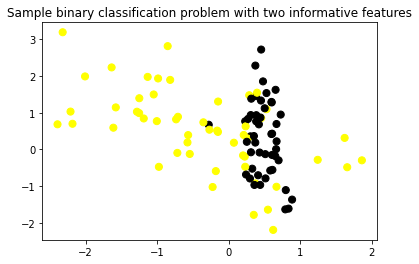

In [3]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y=0.1,
                                class_sep=0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker='o', s=50, cmap=cmap_bold)
plt.show()

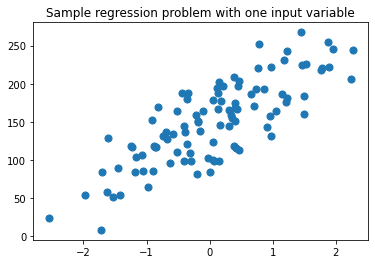

In [4]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                            n_informative=1, bias=150.0,
                            noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)
plt.show()

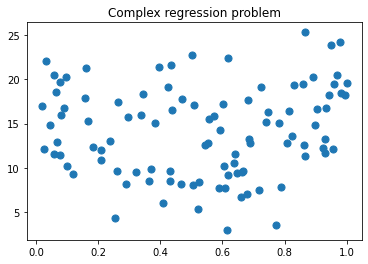

In [5]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem')
X_F1, y_F1 = make_friedman1(n_samples=100,
                           n_features=7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker='o', s=50)
plt.show()

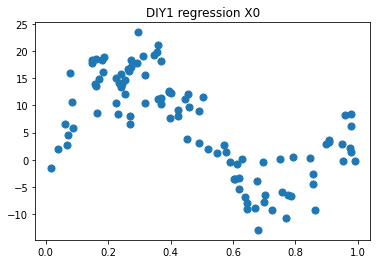

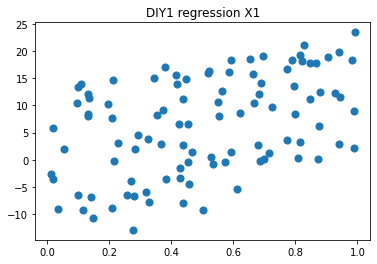

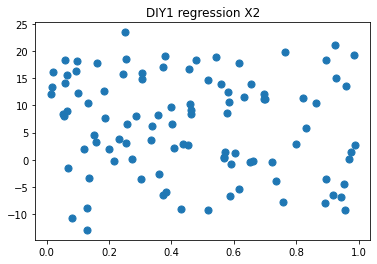

In [6]:
# generate your customized synthetic data
import numpy as np

def diy1(n_samples, n_features, noise=0.0, random_state=0):
    assert n_features > 1
    rs = np.random.RandomState(random_state)
    X = rs.uniform(size=(n_samples, n_features))
    y = 10 * np.sin(2*np.pi * X[:, 0]) + 10 * X[:, 1] + noise * rs.normal(size=(n_samples,))
    return X, y


X_diy1, y_diy1 = diy1(n_samples=100, n_features=5, noise=3)

plt.figure()
plt.title('DIY1 regression X0')
plt.scatter(X_diy1[:, 0], y_diy1, marker='o', s=50)
plt.show()

plt.figure()
plt.title('DIY1 regression X1')
plt.scatter(X_diy1[:, 1], y_diy1, marker='o', s=50)
plt.show()

plt.figure()
plt.title('DIY1 regression X2')
plt.scatter(X_diy1[:, 2], y_diy1, marker='o', s=50)
plt.show()

### (Exercise) Create another sythetic data
y(X) = 10 * X[:, 0] + 3 * X[:, 1] - 6 * X[:, 2] - 2 * X[:, 3] + noise * N(0, 1).

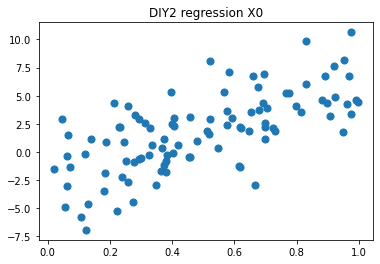

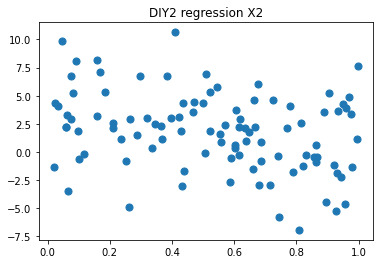

In [8]:
def diy2(n_samples, n_features, noise=0.0, random_state=0):
    assert n_features >= 4

    # %%% Your code here
    rs = np.random.RandomState(random_state)
    X = rs.uniform(size=(n_samples, n_features))
    y = 10 * X[:, 0] + 3 * X[:, 1] - 6 * X[:, 2] - 2 * X[:, 3] + noise * rs.normal(size=(n_samples,))
    
    return X, y

X_diy2, y_diy2 = diy2(n_samples=100, n_features=7, noise=2)

plt.figure()
plt.title('DIY2 regression X0')
plt.scatter(X_diy2[:, 0], y_diy2, marker='o', s=50)
plt.show()

plt.figure()
plt.title('DIY2 regression X2')
plt.scatter(X_diy2[:, 2], y_diy2, marker='o', s=50)
plt.show()

## Linear regression

### Linear regression with 1 variable

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

# instance variable names ending in a trailing underscore represent attributes that have been estimated from the data.
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


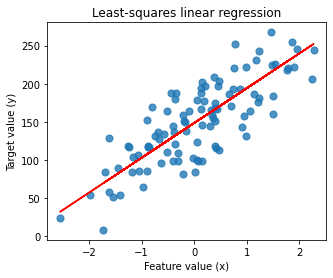

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### (Exercise) Multivariate linear regression
Fit a linear regression model on the synthetic data you generated (X_diy2, y_diy2). 

What can you tell comparing the learned model coefficients with the ground truth coefficients?

In [11]:
# %%% Your code: use train_test_split to split (X_diy2, y_diy2) into (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X_diy2, y_diy2,
                                                   random_state=0)

# %%% Your code: fit a linear regression model, name it as `linreg`
linreg = LinearRegression().fit(X_train, y_train)

# instance variable names ending in a trailing underscore represent attributes that have been estimated from the data.
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 9.85885859  4.20929616 -5.1967734  -2.09892993 -0.2491747   0.62152047
 -0.29695163]
linear model intercept (b): -1.322
R-squared score (training): 0.814
R-squared score (test): 0.411


### Plot the residuals
We will see the residuals of both the model fitted on linear data and the model fitted on non-linear data.

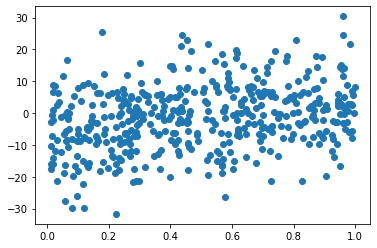

In [12]:
# generate another group of linear data (X_R2, y_R2), where y_R2 = 20 * X_R2 + 10 * N(0, 1)
random_state = np.random.RandomState(0)
X_R2 = random_state.uniform(size=(500, 1))
y_R2 = 20 * X_R2 + 10 * random_state.normal(size=(500, 1))

X_train, X_test, y_train, y_test = train_test_split(X_R2, y_R2, random_state=0, test_size=0.9)

# fit the model
linreg = LinearRegression().fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

# plot the residuals
plt.scatter(X_test[:, 0], y_pred - y_test)


The residuals at any x approximately follow a normal distribution N(0, 10). 

## Underfitting

linear model coeff (w): [-19.00509881   7.15178343]
linear model intercept (b): 10.540
R-squared score (training): 0.439
R-squared score (test): 0.461


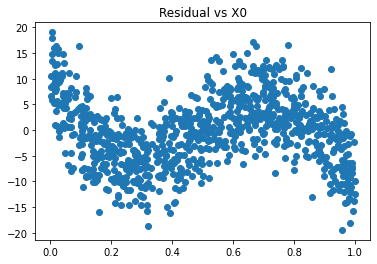

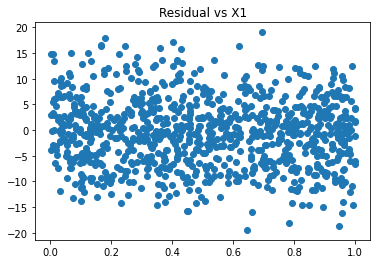

In [13]:
#### Cell A ####

# generate a set of nonlinear data using the diy1 function
X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5)

X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, random_state=0, test_size=0.9)

# fit the model
linreg = LinearRegression().fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

# plot the residuals vs X0 and X1 respectively
plt.figure()
plt.title("Residual vs X0")
plt.scatter(X_test[:, 0], y_pred - y_test)

plt.figure()
plt.title("Residual vs X1")
plt.scatter(X_test[:, 1], y_pred - y_test)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

The residuals vs X0 show a sin-ish shape rather than a normal distribution. This is because the current model is not expressive enough to fit the nonlinear data. This situation is called underfitting.

## Feature expansion
Feature expansion is one of the simplest method to improve the model expressiveness. 

### Feature expansion with good knowledge about the task
As a sanity check that feature expansion is indeed useful, we first assume that we, for some reasons, have very good knowledge about the task so that we know `sin(2 * pi * X_diy1[:, 0])` is a good feature. In the cell B below, we expand the original feature set with this good feature.

Comparing to Cell A above, you will see the R-squared scores for both training and test data improve significantly, and the learned coefficients will be very close to the ground truth in the `diy1` function. Furthermore, you will see the sin shape in the residuals disappears.

linear model coeff (w): [ 0.20451962  7.62115118 11.38119335]
linear model intercept (b): 0.356
R-squared score (training): 0.781
R-squared score (test): 0.694


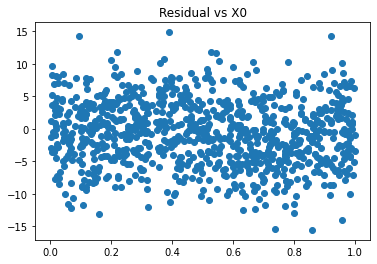

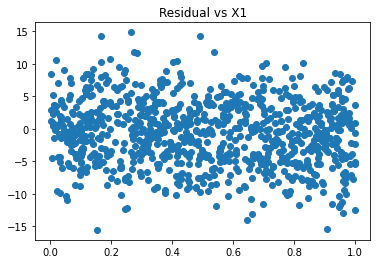

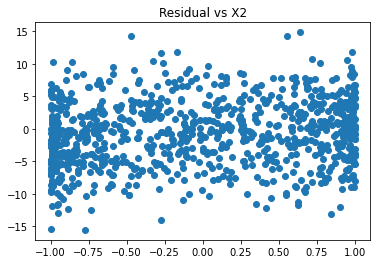

In [14]:
#### Cell B ####

# generate a set of nonlinear data using the diy1 function
X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5)
X_diy1 = np.concatenate([X_diy1, np.sin(2*np.pi * X_diy1[:, 0]).reshape(-1, 1)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, random_state=0, test_size=0.9)

# fit the model
linreg = LinearRegression().fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

# plot the residuals vs X0, X1, and X2 respectively
plt.figure()
plt.title("Residual vs X0")
plt.scatter(X_test[:, 0], y_pred - y_test)

plt.figure()
plt.title("Residual vs X1")
plt.scatter(X_test[:, 1], y_pred - y_test)

plt.figure()
plt.title("Residual vs X2")
plt.scatter(X_test[:, 2], y_pred - y_test)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### (Exercise) Use `sin(0.5 * pi * X[:, 0])` as feature expansion
In practice, however, we usually are not lucky enough to have such good knowledge about the task. In this exercise, please add a sub-optimal feature  `sin(0.5 * pi * X[:, 0])` to the original `X_diy1` feature set. And observe the R-squared scores and the residuals.

linear model coeff (w): [ -1.38523459   6.96374675 -17.38635143]
linear model intercept (b): 12.736
R-squared score (training): 0.455
R-squared score (test): 0.464


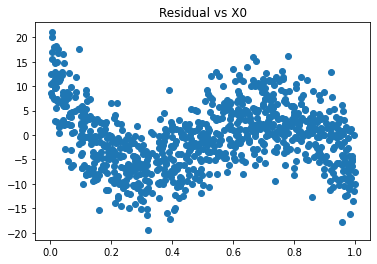

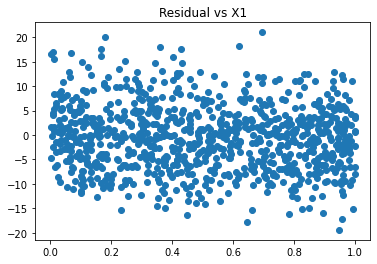

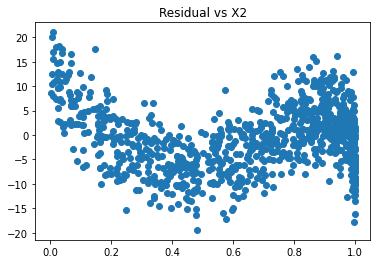

In [17]:
#### Cell C ####

# generate a set of nonlinear data using the diy1 function
X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5)

# %%% Your code: do the feature expansion according to the question.
X_diy1 = np.concatenate([X_diy1, np.sin(0.5 * np.pi * X_diy1[:, 0]).reshape(-1, 1)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, random_state=0, test_size=0.9)

# fit the model
linreg = LinearRegression().fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

# plot the residuals vs X0, X1, and X2 respectively
plt.figure()
plt.title("Residual vs X0")
plt.scatter(X_test[:, 0], y_pred - y_test)

plt.figure()
plt.title("Residual vs X1")
plt.scatter(X_test[:, 1], y_pred - y_test)

plt.figure()
plt.title("Residual vs X2")
plt.scatter(X_test[:, 2], y_pred - y_test)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Polynomial feature expansion
In Cell C above, you should see that with a sub-optimal feature expansion, the model is not able to do better than with the original feature set. So it should be clear at this point that what features to expand is critical. A natural question follows: are there generally good feature expansion methods that could be helpful to many tasks? Luckily, we do have some good choices. 

The intuition behind feature expansion is that, after adding some nonlinear features, we hope the label will be linearly dependent on the expaned feature set so that the linear regression model can have enough expressive power. Taylor's theorem told us a large group of functions can be decomposed as a linear combination of the polynomial basis functions. 

Next, we are going to try polynomial feature expansion with `sklearn.preprocessing.PolynomialFeatures`. You will see that with the polynomial expansion of degree up to 3, the model can do a similarly good job as that in Cell B.

1000 10
linear model coeff (w): [   0.          133.58933765    8.5908685  -385.95368402  -20.1012006
   -3.79944274  259.9525574     1.47478282   17.47365922    3.56675271]
linear model intercept (b): -0.854
R-squared score (training): 0.789
R-squared score (test): 0.687


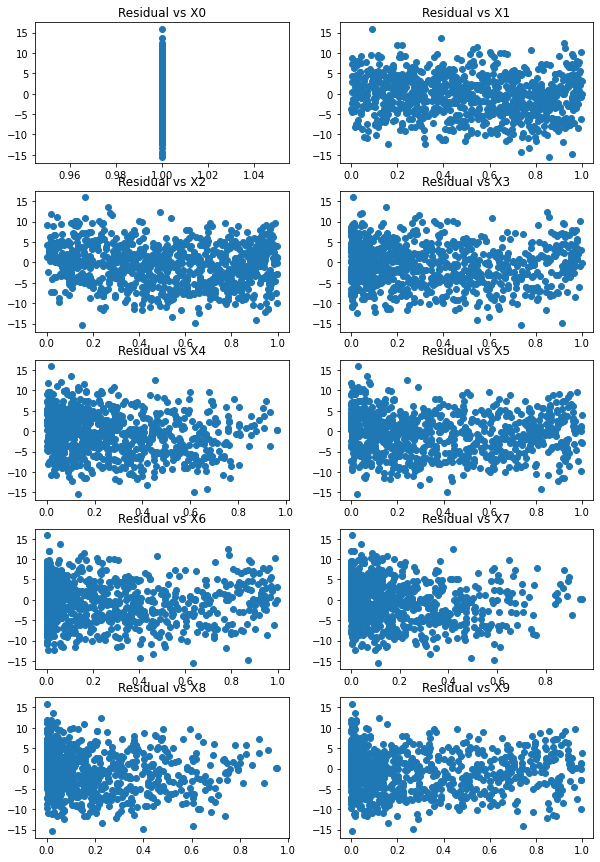

In [18]:
#### Cell D ####

from sklearn.preprocessing import PolynomialFeatures

# generate a set of nonlinear data using the diy1 function
X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5)
poly = PolynomialFeatures(degree=3)
X_diy1 = poly.fit_transform(X_diy1)
print(len(X_diy1), len(X_diy1[0]))
# degress 3 means: [a, b] -> [1, a, b, a^2, ab, b^2, a^3, a^2 b, ab^2, b^3]
X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, random_state=0, test_size=0.9)

# fit the model
linreg = LinearRegression().fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

# plot the residuals vs different polynomial features
plt.figure(figsize=(10, 15))
for i in range(10):
    ax = plt.subplot(5, 2, i+1)
    ax.title.set_text("Residual vs X{}".format(i))
    ax.scatter(X_test[:, i], y_pred - y_test)


print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Overfitting

### Increasing the polynomial expansion set
Polynomial expansion looks nice. However, if you keep increasing the expanded features, you will soon meet another undesirable situation, overfitting. 

In the following Cell E, we expand the polynomial features up to degree of 5. You will see that, compared to the results in Cell D, the R-squared on training set continues to improve but the R-squared on test set drops significantly.

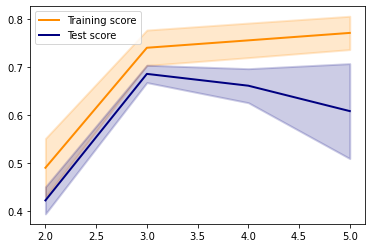

In [19]:
#### Cell E ####

# plot train and test scores vs degree

param_range = list(range(2, 6))
train_scores = []
test_scores = []
for d in param_range:
    train_scores.append([])
    test_scores.append([])
    for i in range(1000):
        # generate a set of nonlinear data using the diy1 function
        X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5)
        poly = PolynomialFeatures(degree=d)
        X_diy1 = poly.fit_transform(X_diy1)

        X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, test_size=0.9)

        # fit the model
        linreg = LinearRegression().fit(X_train, y_train)
        train_scores[-1].append(linreg.score(X_train, y_train))
        test_scores[-1].append(linreg.score(X_test, y_test))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
lw = 2
    
plt.plot(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.plot(param_range, test_scores_mean, label='Test score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)
plt.legend(loc='best')
plt.show()


### (Exercise) Investigate overfitting with different train/test split ratio

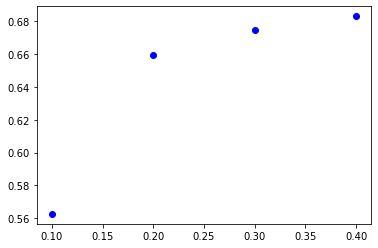

In [21]:
t = [0.1 * i for i in range(1, 5)]
for s in t:
    scores = []
    for i in range(1000):
        # generate a set of nonlinear data using the diy1 function
        X_diy1, y_diy1 = diy1(n_samples=1000, n_features=2, noise=5, random_state=i)
        poly = PolynomialFeatures(degree=5)
        X_diy1 = poly.fit_transform(X_diy1)
        
        # %%% Your code: split (X_diy1, y_diy1) with test_size=(1 - s)
        X_train, X_test, y_train, y_test = train_test_split(X_diy1, y_diy1, test_size=(1 - s))
        # fit the model
        linreg = LinearRegression().fit(X_train, y_train)
        
        scores.append(linreg.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

## K-fold Cross Validation

### Apply `cross_val_score` on the simple regression data (X_R1, y_R1)

In [22]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
cv_scores = cross_val_score(linreg, X_R1, y_R1, cv=3)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.57447588 0.58987265 0.55276667]
Mean cross-validation score (3-fold): 0.572


### (Exercise) Apply `cross_val_score` on the complex regression data (X_F1, y_F1)
You should see there is a larger variation of the cv_scores compared to that on the simple regression data.

In [24]:
linreg = LinearRegression()

# %%% Your code: get cv_scores of the model on (X_F1, y_F1)
cv_scores = cross_val_score(linreg, X_F1, y_F1, cv=3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.76624002 0.58001195 0.4592379 ]
Mean cross-validation score (3-fold): 0.602


# (Optional Exercise) Apply linear regression on the Crime dataset

In this optional exercise, write your own code to apply linear regression on the crime dataset. You may want to try different feature scalers and feature expasion methods. Also try regularized linear regression methods `sklearn.linear_model.Ridge` and `sklearn.linear_model.Lasso` besides the original `sklearn.linear_model.LinearRegression`. 

As a reference, it should not be too hard to achieve the following performance:
```
R-squared score (training): 0.764
R-squared score (test): 0.604
```

In [25]:
import pandas as pd
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_csv(files['CommViolPredUnnormalizedData.txt'], sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

(X_crime, y_crime) = load_crime_dataset()
X_train, X_test, y_train, y_test = train_test_split(np.array(X_crime), np.array(y_crime), random_state=0)

In [26]:
# %%% Your code
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

(X_crime, y_crime) = load_crime_dataset()

poly = PolynomialFeatures(degree=2)
X_crime = poly.fit_transform(X_crime)

X_train, X_test, y_train, y_test = train_test_split(np.array(X_crime), np.array(y_crime), random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
linreg = Ridge(alpha=2.0, max_iter=10000)

linreg.fit(X_train, y_train)

# make predictions on the test set
y_pred = linreg.predict(X_test)

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

R-squared score (training): 0.764
R-squared score (test): 0.604
